In [78]:
import pandas as pd
import seaborn as sns
from datetime import datetime as dt, timedelta
df = pd.read_csv('query.csv')
# заменим пропуски данных о выручке нулями
df.revenue = df.revenue.fillna(0)
# переведём в формат даты время фактического вылета и прилёта
df.actual_departure=pd.to_datetime(df.actual_departure,format='%Y/%m/%d')
df.actual_arrival=pd.to_datetime(df.actual_arrival,format='%Y/%m/%d')
# рассчитаем время в полёте
df.flight_time = df.actual_arrival - df.actual_departure
# переведём время полёта в секунды
df.flight_time = df.flight_time.apply(lambda x: x.total_seconds())
# добавим признак получения выручки за секунду полёта
df.insert(15, "fly_income", df.revenue/df.flight_time)
df.insert(9, "dayofweek", df.actual_departure.dt.dayofweek)

df.sample(3)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,dayofweek,actual_arrival,flight_id.1,revenue,aircraft_code.1,model,flight_time,fly_income
162,136865,PG0480,2016-12-11T09:25:00Z,2016-12-11T10:15:00Z,AAQ,EGO,Arrived,SU9,2016-12-11 09:29:00+00:00,6,2016-12-11 10:19:00+00:00,136865.0,695400.0,SU9,Sukhoi Superjet-100,3000.0,231.800000
82,136366,PG0252,2017-01-11T10:05:00Z,2017-01-11T11:45:00Z,AAQ,SVO,Arrived,733,2017-01-11 10:08:00+00:00,2,2017-01-11 11:47:00+00:00,136366.0,1527400.0,733,Boeing 737-300,5940.0,257.138047
87,136252,PG0252,2016-12-20T10:05:00Z,2016-12-20T11:45:00Z,AAQ,SVO,Arrived,733,2016-12-20 10:05:00+00:00,1,2016-12-20 11:46:00+00:00,136252.0,1517600.0,733,Boeing 737-300,6060.0,250.429043


In [81]:
df2 = df[df.fly_income == 0]
df2.sample(3)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,dayofweek,actual_arrival,flight_id.1,revenue,aircraft_code.1,model,flight_time,fly_income
5,136564,PG0194,2016-12-27T06:10:00Z,2016-12-27T11:15:00Z,AAQ,NOZ,Arrived,733,2016-12-27 06:16:00+00:00,1,2016-12-27 11:21:00+00:00,NaN,0.0,733,Boeing 737-300,18300.0,0.0
7,136540,PG0194,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-17 06:14:00+00:00,1,2017-01-17 11:21:00+00:00,NaN,0.0,733,Boeing 737-300,18420.0,0.0
12,136514,PG0194,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,AAQ,NOZ,Arrived,733,2017-02-07 06:14:00+00:00,1,2017-02-07 11:13:00+00:00,NaN,0.0,733,Boeing 737-300,17940.0,0.0


Исключим рейсы без данных о доходе из выборки, чтобы не искажать остальные данные.

In [82]:
df = df[df.fly_income > 0]

In [83]:
df.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'dayofweek', 'actual_arrival', 'flight_id.1',
       'revenue', 'aircraft_code.1', 'model', 'flight_time', 'fly_income'],
      dtype='object')

In [84]:
display(df.groupby(['model']).mean())

,flight_id,dayofweek,flight_id.1,revenue,flight_time,fly_income
model,,,,,,
Boeing 737-300,136307.800000,3.011111,136307.800000,1.646898e+06,5998.000000,274.663900
Sukhoi Superjet-100,136773.788889,3.011111,136773.788889,7.123967e+05,3000.666667,237.410837


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 13 to 192
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   flight_id            180 non-null    int64              
 1   flight_no            180 non-null    object             
 2   scheduled_departure  180 non-null    object             
 3   scheduled_arrival    180 non-null    object             
 4   departure_airport    180 non-null    object             
 5   arrival_airport      180 non-null    object             
 6   status               180 non-null    object             
 7   aircraft_code        180 non-null    object             
 8   actual_departure     180 non-null    datetime64[ns, UTC]
 9   dayofweek            180 non-null    int64              
 10  actual_arrival       180 non-null    datetime64[ns, UTC]
 11  flight_id.1          180 non-null    float64            
 12  revenue              

In [86]:
pivot = df.pivot_table(values=['fly_income'],
index=['model'],
aggfunc='mean',
margins=False,
fill_value=0)
display(pivot.sort_values('model', ascending=False)) 

,fly_income
model,
Sukhoi Superjet-100,237.410837
Boeing 737-300,274.663900


In [87]:
pivot = df.pivot_table(values=['fly_income'],
index=['dayofweek'],
aggfunc='mean',
margins=False,
fill_value=0)
display(pivot.sort_values('dayofweek', ascending=False)) 

,fly_income
dayofweek,
6,245.575787
5,252.910349
4,262.517474
3,259.244440
2,260.843540
1,256.839254
0,254.700441


<AxesSubplot:xlabel='dayofweek'>

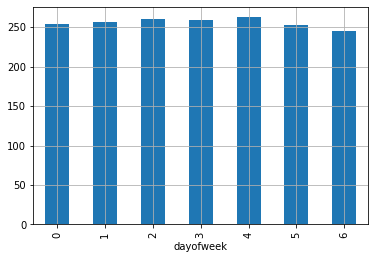

In [90]:
df.groupby(by = ['dayofweek'])['fly_income'].mean().plot(kind = 'bar', grid= True)

Выручка по дням недели практически не отличается


<AxesSubplot:xlabel='model', ylabel='fly_income'>

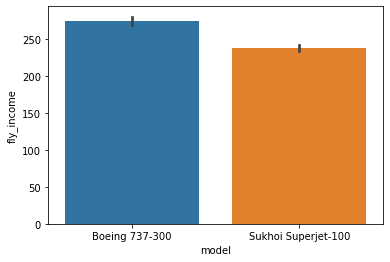

In [89]:
sns.barplot(x = 'model', y = 'fly_income', data = df)

Выручка выше у Боинга, это нормально, т.к. у него больше мест, он крупнее, соответственно и расходы на топливо у него выше, но этих данных у нас нет.

In [91]:
df.describe()

,flight_id,dayofweek,flight_id.1,revenue,flight_time,fly_income
count,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000
mean,136540.794444,3.011111,136540.794444,1.179647e+06,4499.333333,256.037369
std,258.233139,2.013887,258.233139,4.811836e+05,1503.702544,29.019178
min,136119.000000,0.000000,136119.000000,5.310000e+05,2940.000000,177.000000
25%,136309.000000,1.000000,136309.000000,7.385250e+05,3000.000000,240.155442
50%,136531.500000,3.000000,136531.500000,1.068850e+06,4470.000000,253.000000
75%,136775.000000,5.000000,136775.000000,1.631950e+06,6000.000000,272.995875
max,136961.000000,6.000000,136961.000000,1.886000e+06,6180.000000,320.748299


Видим минимальный доход на единицу времени полёта на уровне 177 руб\сек. Посмотрим какие рейсы совершены с доходом менее 200 руб/сек.

In [93]:
df.min = df[df.fly_income < 200]
df.min

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,dayofweek,actual_arrival,flight_id.1,revenue,aircraft_code.1,model,flight_time,fly_income
190,136844,PG0480,2017-02-28T09:25:00Z,2017-02-28T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-28 09:26:00+00:00,1,2017-02-28 10:16:00+00:00,136844.0,575100.0,SU9,Sukhoi Superjet-100,3000.0,191.700000
191,136807,PG0480,2017-02-23T09:25:00Z,2017-02-23T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-23 09:28:00+00:00,3,2017-02-23 10:18:00+00:00,136807.0,531000.0,SU9,Sukhoi Superjet-100,3000.0,177.000000
192,136642,PG0480,2017-01-30T09:25:00Z,2017-01-30T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-30 09:28:00+00:00,0,2017-01-30 10:17:00+00:00,136642.0,531000.0,SU9,Sukhoi Superjet-100,2940.0,180.612245


Если мы хотим сократить количество наименее прибыльных рейсов, то эти три рейса мы проверим в первую очередь.